# Correlations

##### Check for correlations on both EU and country-specific level


#### Package import 

In [5]:
library(dplyr)
library(tidyverse)
library(ggplot2)
library(corrplot)

#### Functions

In [6]:
country_corr <- function(country, data){
    data_country  <- data %>% 
            filter(substr(NUTS_ID, 1, 2) == country) %>% 
            mutate(id=paste(NUTS_ID, TIMESTAMP, sep="_")) %>%
            select(-c(NUTS_ID, TIMESTAMP)) %>%
            column_to_rownames(var="id") 
    
    return(data_country)
    }

#### Data Import

In [11]:
data <- arrow::read_csv_arrow("s3://ecb-hackathon-data-group07-x19s00/processed_data/climate_matrix.csv")

#### Data visualisation

##### EU

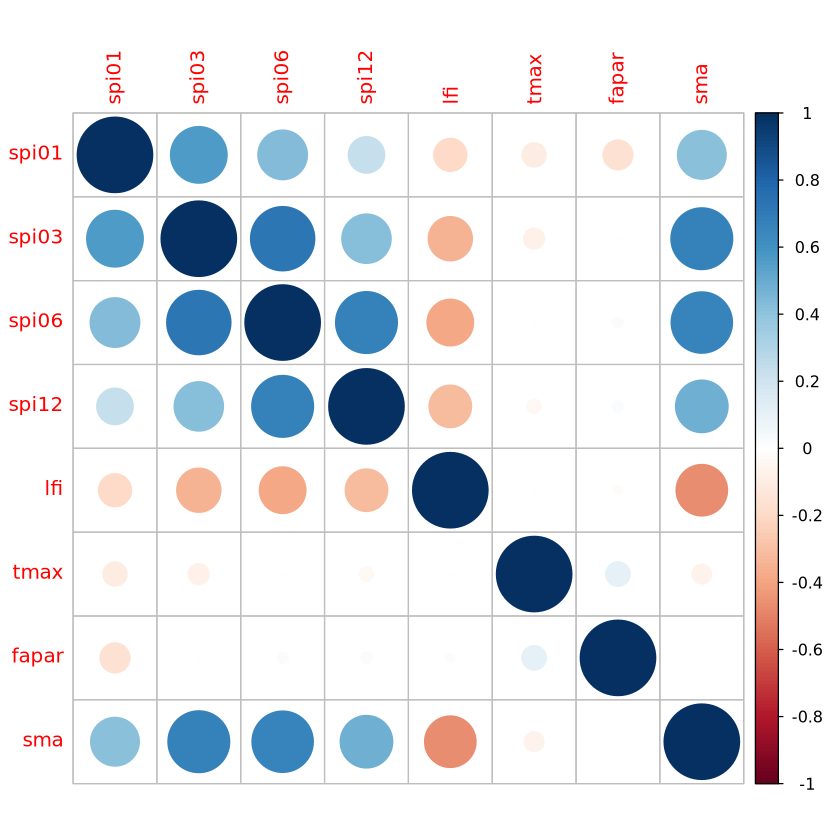

In [12]:
data_EU <- data %>% 
            mutate(id=paste(NUTS_ID, TIMESTAMP, sep="_")) %>%
            select(-c(NUTS_ID, TIMESTAMP)) %>%
            column_to_rownames(var="id") 

cor_EU <- cor(data_EU, use = "complete.obs")
corrplot(cor_EU)

##### DE

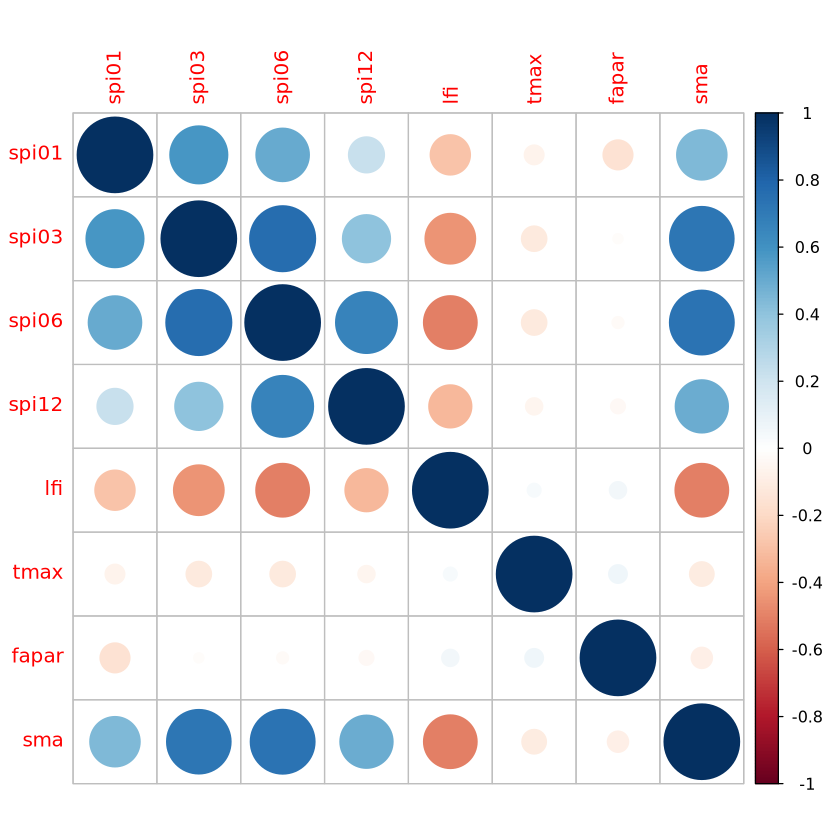

In [13]:
data_DE <- country_corr('DE', data)
cor_DE <- cor(data_DE, use = "complete.obs")
# print(cor_DE)
corrplot(cor_DE)

##### IT

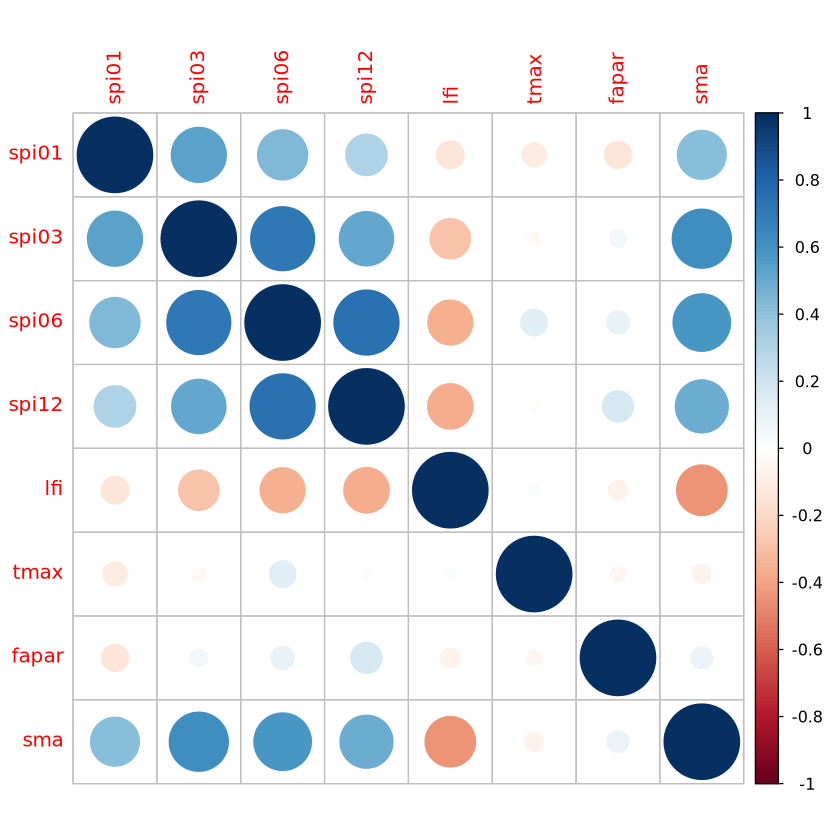

In [14]:
data_IT <- country_corr('IT', data)
cor_IT <- cor(data_IT, use = "complete.obs")
# print(cor_IT)
corrplot(cor_IT)

##### RO

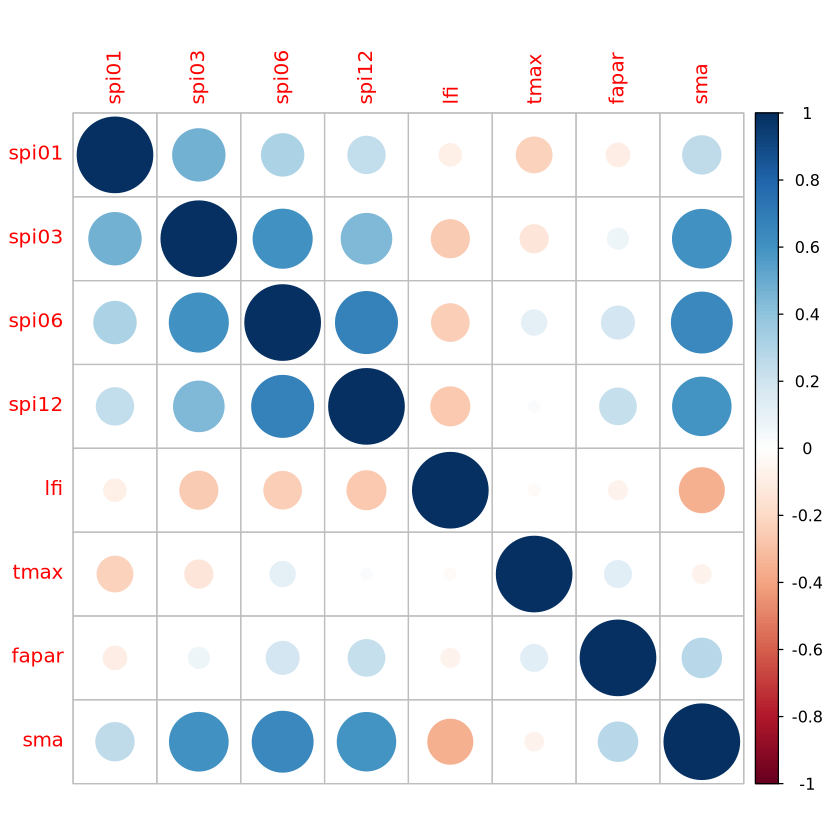

In [15]:
data_RO <- country_corr('RO', data)
cor_RO <- cor(data_RO, use = "complete.obs")
#print(cor_RO)
corrplot(cor_RO)